<a href="https://colab.research.google.com/github/andrewhayes4458/2ndWebsite/blob/master/NLP_Class_2_1_14_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, SpatialDropout1D
from keras.layers import SimpleRNN # new! 
from keras.callbacks import ModelCheckpoint
import os
from sklearn.metrics import roc_auc_score 
import matplotlib.pyplot as plt 
%matplotlib inline

Using TensorFlow backend.


In [0]:
# output directory name:
output_dir = 'model_output/rnn'

# training:
epochs = 16
batch_size = 128

# vector-space embedding: 
n_dim = 64 
n_unique_words = 10000 
max_review_length = 100 # lowered due to vanishing gradient over time
pad_type = trunc_type = 'pre'
drop_embed = 0.2 

# RNN layer architecture:
n_rnn = 256 
drop_rnn = 0.2

In [0]:
(x_train, y_train), (x_valid, y_valid) = imdb.load_data(num_words=n_unique_words) # removed n_words_to_skip

In [0]:

x_train = pad_sequences(x_train, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)
x_valid = pad_sequences(x_valid, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)

In [0]:
model = Sequential()
model.add(Embedding(n_unique_words, n_dim, input_length=max_review_length)) 
model.add(SpatialDropout1D(drop_embed))
model.add(SimpleRNN(n_rnn, dropout=drop_rnn))
model.add(Dense(1, activation='sigmoid'))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 64)           640000    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 100, 64)           0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 256)               82176     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 722,433
Trainable params: 722,433
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_valid, y_valid))

Train on 25000 samples, validate on 25000 samples
Epoch 1/16
25000/25000 [==============================] - 19s 770us/step - loss: 0.7021 - acc: 0.5110 - val_loss: 0.7016 - val_acc: 0.5054
Epoch 2/16
25000/25000 [==============================] - 18s 716us/step - loss: 0.6884 - acc: 0.5396 - val_loss: 0.6787 - val_acc: 0.5588
Epoch 3/16
25000/25000 [==============================] - 18s 723us/step - loss: 0.6447 - acc: 0.6208 - val_loss: 0.5376 - val_acc: 0.7381
Epoch 4/16
25000/25000 [==============================] - 18s 721us/step - loss: 0.5684 - acc: 0.7187 - val_loss: 0.6362 - val_acc: 0.6530
Epoch 5/16
25000/25000 [==============================] - 18s 718us/step - loss: 0.5324 - acc: 0.7332 - val_loss: 0.6080 - val_acc: 0.6627
Epoch 6/16
25000/25000 [==============================] - 18s 714us/step - loss: 0.4278 - acc: 0.8120 - val_loss: 0.4505 - val_acc: 0.8022
Epoch 7/16
25000/25000 [==============================] - 18s 711us/step - loss: 0.3610 - acc: 0.8502 - val_loss: 0.

In [0]:
import keras
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, SpatialDropout1D
from keras.layers import LSTM 
from keras.callbacks import ModelCheckpoint
import os
from sklearn.metrics import roc_auc_score 
import matplotlib.pyplot as plt 
%matplotlib inline

In [0]:
# output directory name:
output_dir = 'model_output/vanillaLSTM'

# training:
epochs = 4
batch_size = 128

# vector-space embedding: 
n_dim = 64 
n_unique_words = 10000 
max_review_length = 100 # lowered due to vanishing gradient over time
pad_type = trunc_type = 'pre'
drop_embed = 0.2 

# LSTM layer architecture:
n_lstm = 256 
drop_lstm = 0.2

# dense layer architecture: 
# n_dense = 256
# dropout = 0.2

In [0]:
(x_train, y_train), (x_valid, y_valid) = imdb.load_data(num_words=n_unique_words) # removed n_words_to_skip

In [0]:
x_train = pad_sequences(x_train, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)
x_valid = pad_sequences(x_valid, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)

In [0]:
model = Sequential()
model.add(Embedding(n_unique_words, n_dim, input_length=max_review_length)) 
model.add(SpatialDropout1D(drop_embed))
model.add(LSTM(n_lstm, dropout=drop_lstm))
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 64)           640000    
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 100, 64)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 256)               328704    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 968,961
Trainable params: 968,961
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [0]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_valid, y_valid))

Train on 25000 samples, validate on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 45s 2ms/step - loss: 0.5419 - acc: 0.7068 - val_loss: 0.3682 - val_acc: 0.8412
Epoch 2/4
25000/25000 [==============================] - 44s 2ms/step - loss: 0.3062 - acc: 0.8736 - val_loss: 0.3532 - val_acc: 0.8445
Epoch 3/4
25000/25000 [==============================] - 44s 2ms/step - loss: 0.2421 - acc: 0.9049 - val_loss: 0.3498 - val_acc: 0.8468
Epoch 4/4
25000/25000 [==============================] - 45s 2ms/step - loss: 0.2002 - acc: 0.9237 - val_loss: 0.4006 - val_acc: 0.8382


In [0]:
y_hat = model.predict_proba(x_valid)

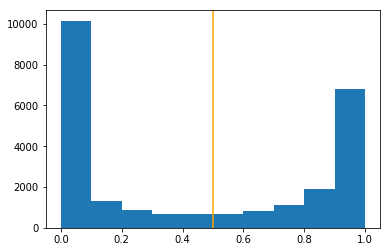

In [0]:
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')